# The Perceptron

The *Perceptron* is on of the simplest Artificial neural network architectures, proposed in 1957 by Frank Rosenblatt. It is based on a *threshold logic unit (TLU)* and it computes a weighted sum of its inputs

$$ z = w_1x_1 + \cdots + w_nx_n = \textbf{x}^{\intercal}\textbf{w} $$

then applies a step function to that sum and outputs the result: $h_w(\textbf{x})=\text{step}(\textbf{x})$. One of the most common step function used is the *Heaviside step function*

$$ \text{heaviside}(z) = \begin{cases} 0 & \text{if } z<0 \\ 1 & \text{if } z\gt0 \end{cases}$$

A single TLU can be used for binary classification; it computes a linear combination of its inputs and if the output reaches a threshold, it outputs a positive class, otherwise outputs the negative class.

A perceptron is composed of a single layer of TLUs, with each TLU connected to all the inputs. When all the neurons in a layer are connected to every neuron in the previous layer the layer is called a *fully connected* or *dense* layer. *Input Neurons* are simple inputs that output whatever they are fed and all input neurons form the *input layer*. A bias neuron is generally added, tipycally represented by a *bias neuron*, which outputs 1 all the time. (e.g. architecture pg 286 fig 10-5)

We can then write the outputs of a fully connected layer as 
$$ h_{\textbf{W, b}}(\textbf{X}) = \phi(\textbf{XW + b})$$
Where
- $\textbf{X}$ is the matrix of input features (one row per instance, one col per feature)
- $\textbf{W}$ contains the connection weights, except the ones from the bias neuron (one row per input neuron, one column per artificial neuron in the layer)
- $\phi$ is called the *activation function* (when the neurons are TLU, this is a step function)

The perceptron learning rule reinforces connections between neurons tha help reduce the error: the perceptron is fed one training instance at a time, and for each instance it makes its predictions. For every output neuron that produced a wrong predictions, it reinforces the connection weights from the inputs that would have contributed to the correct prediction

$$ w_{i,j}^{\text{next step}} = w_{i,j} +\eta(y_j - \hat{y_j})x_i$$

where 
- $w_{i,j}$ is the weight between ith input neuron and jth output neuron
- $x_i$ is the ith input value of the current training instance
- $\hat{y_j}$ is the output of the jth output neuron 
- $y_j$ is the target output of the jth ouptut neuron
- $\eta$ is the learning rate

# The multilayer perceptron and backpropagation

An MLP consistis of one input layer, one or more layers of TLUs (called *hidden layers*) and one final layer of TLUs called the *output layer*. Every except the output layer includes a bias neuron and is fully connected to the next layer.

To train an MLP, we use [backpropagation](https://homl.info/44). In short, it is Gradient Descent and it is able to compute the gradient of the network's error with regard to every single model parameter, thus it is able to find out how much it should tweak each connection weight and bias in order to reduce the error. This process is called *autodiff*, appendix D has more info on it.

Here's how it works
- It handles one mini-batch at a time (e.g. 32 instances) and goes through the training set multiple times, each pass is called an *epoch*
- Each mini-batch is passed is passed to the network's input layer, which sends it to the first hidden layer. The algorithm then computes the outputs of this layer and passes it to the next layer, and so on, until we get the output of the output layer. This is called a *forward pass* and the intermediate results are saved
- Next we calculate the network's output error (using some loss function)
- Then it computs how much each output connection contributed to the error (done using chain rule)
- The algorithm then measures how much of these error contributions came from each connection in the layer below until it reaches the input layer
- Finally, it performs a gradient descent step to tweak all the connection weights in the network

One change that had to be made to the original MLP architecture was replacing the step function with the logistic function $\sigma(z) = 1 / (1 +\exp(-z))$, this allows for gradients to be computed as it is a smooth function.

Some other choices of function are:
- Hyperbolic tan $\tanh(z) = 2\sigma(2z) - 1$

Another S-shaped function, continues and differentiable. Its outputs are in the range -1 to 1, making each layer's output more or less centered around 0 at the beginning of training, which helps speed up convergence.

- Rectified Linear unit $ReLU(z) = \max(0,z)$

Continuous but not differentiable at $z=0$, however it works very well and has become the default.

Activation functions are useful because they can add non-linearity to each layer. Recall that a linear transformation of linear transformations is also linear. Using a non-linear function allows for an MLP to learn more complex patterns.

## Regression MLPs

To use MLP for regression we use an output neuron for each value we want to predict. In the univariate case (e.g. predicting house price) only a single output neuron is needed. 

For multivariate problems, you need one output neuron per output dimension. For example to locate the center of an object in an image, you need to predict 2D coordinates, thus 2 output neurons. If you also want to place a bounding box around the object, you need two more numbers, the width and height of the object. In total, 4 output neurons.

In general we do not want to use any activation function for output neurons so they are free to output any range of values. To guarantee the range of values is always positive, use ReLU or *softplus*, which is a smooth variant of ReLU: $\text{softplus}(z) = \log(1 + \exp(z))$. 
Finally if we want to guarantee the predictions will fall between a range of values we can use the logistic or hyperbolic tangent function, scaling the labels to the appropriate values.

The typical loss function used is MSE, however if you have a lot of outliers in your training set you may want to use the mean absolute error instead. Alternatively use [Huber loss](https://en.wikipedia.org/wiki/Huber_loss), which is a combination of both.


Typical regression MLP architecture

| Hyperparameter | Typical value |
|     ---        |      ---      |
|# input neurons | One per input feature (e.g. 28x28=784 for MNIST) | 
|# hidden layers | Variable (typically 1 to 5) |
|# neurons per hidden layers | Variable (typically 10 to 100) |
|# output layer | 1 per prediction dimension |
|Activation function | $\begin{cases} 
                        \text{None} & \text{ for any range of values } \\ 
                        ReLU/\text{softplus} & \text{ positive outputs }\\
                        \text{logistic/tanh} & \text{ bounded outputs}
                        \end{cases}$ |
|Loss Function | MSE or MAE/Huber (if outliers)|

## Classification MLPs

For binary classification, we just need a single output neuron using the logistic activation function. The output will be in the range 0 - 1 and we can interpret it as an estimated class probability of the positive class. The estimated probability for the negative class is one minus that number.

MLPs can also be used for multilabel binary classification. For example, in an e-mail classification system that tags messages as spam/ham and urgent/non-urgent we would use two output neurons with the logistic function. The first outputs the probability that the e-mail is spam and the second the probability the e-mail is urgent. 
More generally, we use one output neuron for each positive class.

For multiclass calssification (e.g. identifying digit classes 0 through 9), then we need one output neuron per class and should use the softmax activation to ensure estimated probabilities are between 0-1 and they add up to 1.

For the loss function, since we're preducting probability distributions, the cross-entropy loss is generally a good choice

Typical classification MLP architecture

| Hyperparameter | Binary Classification | Multilabel Binary Classification | Multiclass Classification | 
| --- | --- | --- | --- |
|# input neurons | One per input feature | One per input feature | One per input feature |
|# hidden layers | Variable (typically 1 to 5) | Variable (typically 1 to 5) | Variable (typically 1 to 5) |
|# neurons per hidden layers | Variable (typically 10 to 100) | Variable (typically 10 to 100)| Variable (typically 10 to 100)|
|# output neurons | 1 | 1 per label | 1 per class |
|Activation Function| Logistic | Logistic | Softmax |
|Loss Function | Cross Entropy | Cross Entropy | Cross Entropy |

# Exercise 1
Play around in the [Tensorflow Playground](https://playground.tensorflow.org) to get a better feeling for ANNs and explore the following:

# Implementing MLPs with Keras

## Building an Image Classifier using the Sequential API

In this chapter, we will tackle Fashion MNIST, which is a drop-in replacement of MNIST. The images represent fashion items instead of digits, so each class is more diverse.

In [1]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [2]:
X_train_full.shape

(60000, 28, 28)

Data is loaded as ints in the range from 0 to 255. Let's create a validation set and scale the features

In [3]:
X_train_full.dtype

dtype('uint8')

In [4]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [5]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

We need to map the target values to their actual class as well

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Creating the model using the Sequential API
We'll start by creating a classification MLP with two hidden layers

In [7]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Flatten(input_shape=[28,28])) # Converts inputs to 1D array
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

Using TensorFlow backend.


The Sequential API is the simplest kind of model for NNs that are just composed of a single stack of layers connected sequentially. Another way to write the same model could be as follows

In [8]:
model = Sequential([
    Flatten(input_shape=[28,28]),
    Dense(300, activation='relu'),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax'),
])

We can vew a definition of the model by using summary()

In [9]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_5 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Since the model has a lot of parameters, it has a lot of flexibility to train the data. However this also means that it runs the risk of overfitting, especially when we don't have much training data.

We can view a model's Layers

In [10]:
model.layers

In [11]:
hidden1 = model.layers[1]
hidden1.name

'dense_4'

As well as it's weights and biases

In [12]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.03716776, -0.03312553, -0.01866506, ..., -0.04552968,
        -0.06381333,  0.02029909],
       [-0.0718895 ,  0.06939384,  0.03087463, ...,  0.04213425,
         0.03456113, -0.00604291],
       [ 0.06998566, -0.04743899, -0.05342283, ..., -0.0683958 ,
         0.03110686, -0.04788268],
       ...,
       [ 0.06579678,  0.05081166,  0.01587593, ...,  0.06356768,
        -0.02430162, -0.01516398],
       [ 0.01724309, -0.00942904, -0.01034736, ...,  0.067991  ,
         0.01635592,  0.0557151 ],
       [-0.01923738, -0.05680314,  0.07252409, ...,  0.02584322,
        -0.023685  ,  0.01471683]], dtype=float32)

In [13]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

Note the weights are initialized randomly (to break simmetry) and the biases set to zero. To use other initialization methods we can set the ```kernel_initializer``` or ```bias_initializer``` when creating the layer.

Next we compile the model

In [14]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'sgd',
              metrics = ['accuracy'])

We use ```sparse_categorical_crossentropy``` because we have sparse labels (i.e. for each instance there is only a single target class) and the classes are exclusive. If instead we had one target probability per class for each instance  (such as one-hot vectors for a single class) we'd use ```categorical_crossentropy``` instead. 

The optimizer set to ```sgd``` means we'll train the model using simple stochastic gradient descent. 

Finally, we can fit the model

In [23]:
RELOAD = False
CHAPTER_DIR = 'saved_models/10_intro_to_anns/'

In [24]:
if RELOAD:
    model = keras.models.load_model(CHAPTER_DIR + 'model1.h5')
    history = model.history
else:
    history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))
    model.save(CHAPTER_DIR + 'model1.h5')

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2244 - accuracy: 0.9198 - val_loss: 0.3089 - val_accuracy: 0.8874
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2227 - accuracy: 0.9204 - val_loss: 0.3036 - val_accuracy: 0.8908
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2180 - accuracy: 0.9212 - val_loss: 0.3032 - val_accuracy: 0.8916
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2151 - accuracy: 0.9228 - val_loss: 0.3057 - val_accuracy: 0.8920
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2113 - accuracy: 0.9240 - val_loss: 0.3037 - val_accuracy: 0.8934
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2085 - accuracy: 0.9251 - val_loss: 0.3047 - val_accuracy: 0.8930
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2054 - accuracy: 0.9265 - val_loss: 0.3094 - val_accuracy:

Note: instead of passing a validation set, you can also set the ```validation_split``` argument of the ```fit``` method to the ratio of the training set you want Keras to use for validation. 

If the training set is very skewed, with some classes being underrepresented, it can be useful to set the ```class_weight``` parameter, this would give larger weight to underrepresented classes and a lower weight to overrepresented classes.

If you need per instance weights, the ```sample_weight``` can be used. Per-instance weights can be useful if some instances are labelled by experts while others were labeled using a crowdsourcing platform: we might want to give more weights to the former.

We can access the ```history.history``` to access the loss and accuracy of the model

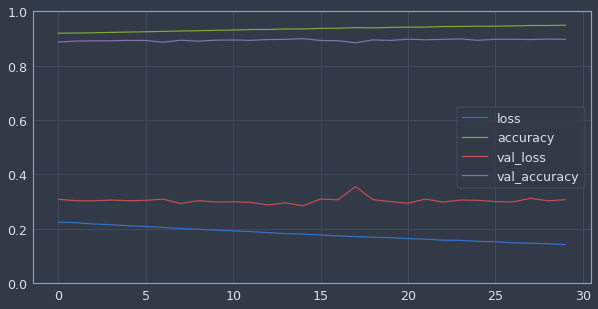

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style()

pd.DataFrame(history.history).plot(figsize=(10, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

It looks like the model performed better on the validation set than on the training set at the beginning, but this is not true.

The validation error is computed at the *end* of each epoch while the training error is computed using a running mean *during* each epoch. So the training curve should actually be shifted half an epoch to the left. 

We can also tell that the model has not quite converged yet as the validation is still going down. We can continue training from where we left off by calling the fit method again.

Epoch 1/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1402 - accuracy: 0.9503 - val_loss: 0.3160 - val_accuracy: 0.8932
Epoch 2/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1380 - accuracy: 0.9513 - val_loss: 0.3029 - val_accuracy: 0.8976
Epoch 3/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1353 - accuracy: 0.9525 - val_loss: 0.3038 - val_accuracy: 0.8992
Epoch 4/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1327 - accuracy: 0.9540 - val_loss: 0.3202 - val_accuracy: 0.8990
Epoch 5/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1305 - accuracy: 0.9545 - val_loss: 0.3145 - val_accuracy: 0.8994
Epoch 6/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1281 - accuracy: 0.9554 - val_loss: 0.3096 - val_accuracy: 0.8942
Epoch 7/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1279 - accuracy: 0.9549 - val_loss: 0.3234 - val_accuracy:

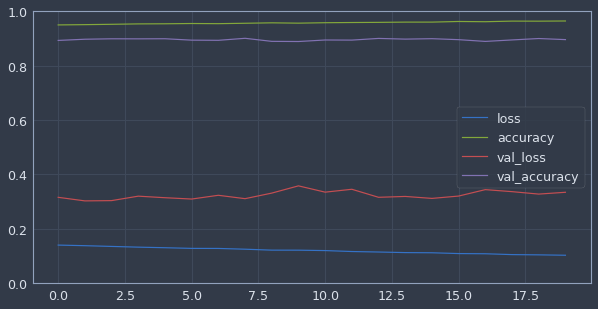

In [26]:
if RELOAD:
    model = keras.models.load_model(CHAPTER_DIR + 'model1_hist2.h5')
    history2 = model.history
else:
    history2 = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
    model.save(CHAPTER_DIR + 'model1_hist2.h5')

pd.DataFrame(history2.history).plot(figsize=(10,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

To improve the model's performance, we perform our usual task: tuning hyperparameters.

The first one to check is the learning rate. If that doesn't help we should check the optimizer (always re-tuning the learning rate after changing any other hyperparameter). If performance is still not great, we can tune the architecture, by changing the number of layers, neurons in each hidden layer and the activation function in the hidden layers.

To estimate the generalisation error, we use the ```evaluation()``` method

In [27]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 96.7621 - accuracy: 0.8437


[96.76213073730469, 0.8436999917030334]

### Making Predictions

Let's use this model to make predictions on the first 3 instances of the test set

In [28]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

For each instance, the model estimated the probability per class, from class 0 to class 9. If we don't care about probabilities and only want the class that has the highest probability we can use ```predict_classes()``` instead.

In [29]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1])

In [30]:
import numpy as np

np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

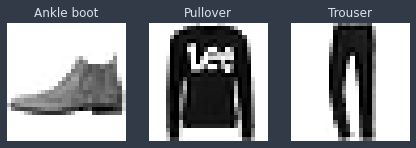

In [31]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

## Building a regression MLP using the Sequential API

We'll use scikit-learn to import a simplified version of the California housing dataset (only numerical features and no missing values). 

In [32]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

Building the model is pretty similar to the steps taken for the example above. Since we're predicting house prices we only need 1 output and the output layer won't use an activation function and, we'll also use mean squared error as the error function. 

Since the dataset is noisy, we'll use a single layer with a few neurons to avoid overfitting.

In [33]:
if RELOAD:
    model = keras.models.load_model(CHAPTER_DIR + 'model2.h5')
else:
    model = Sequential([
        Dense(30, activation='relu', input_shape=X_train.shape[1:]),
        Dense(1)
    ])
    model.compile(loss='mean_squared_error', optimizer='sgd')
    history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
    model.save(CHAPTER_DIR + 'model2.h5')

mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 0s 40us/step - loss: 0.9333 - val_loss: 0.9546
Epoch 2/20
11610/11610 [==============================] - 0s 33us/step - loss: 0.7449 - val_loss: 0.4648
Epoch 3/20
11610/11610 [==============================] - 0s 32us/step - loss: 0.4770 - val_loss: 0.4468
Epoch 4/20
11610/11610 [==============================] - 0s 32us/step - loss: 0.4573 - val_loss: 0.4297
Epoch 5/20
11610/11610 [==============================] - 0s 30us/step - loss: 0.4460 - val_loss: 0.4181
Epoch 6/20
11610/11610 [==============================] - 0s 32us/step - loss: 0.4385 - val_loss: 0.4158
Epoch 7/20
11610/11610 [==============================] - 0s 30us/step - loss: 0.4337 - val_loss: 0.4084
Epoch 8/20
11610/11610 [==============================] - 0s 29us/step - loss: 0.4280 - val_loss: 0.4062
Epoch 9/20
11610/11610 [==============================] - 0s 33us/step - loss: 0.4237 - val_loss: 0.4444
Epoch 

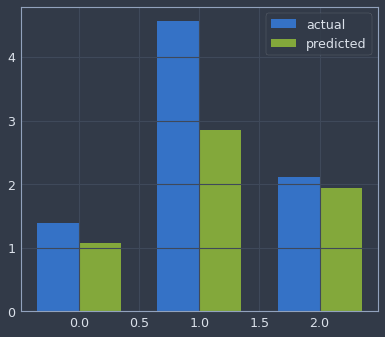

In [34]:
fig, ax = plt.subplots()

width = 0.35
actual = y_test[:X_new.shape[0]]
preds = y_pred.reshape(1,-1)[0]
x_pos = np.arange(X_new.shape[0])

ax.bar(x= x_pos-width/2.0, height=actual, width=width, label='actual')
ax.bar(x= x_pos+width/2.0, height=preds, width=width, label='predicted')
ax.legend()
fig.show()

The sequential API is quite easy to use, however for more complex models Keras offers the Functional API.

## Building complex models with the Functional API

One example of a non-sequential networs is a *Wide and Deep* NN, which was first introduced in a [2016 paper](https://homl.info/widedeep). This architecture allows for the Neural Net to learn both deep pattens (using the deep path) and simple rules (through the short path) (example image on page 309).

In contrast, a regular MLP forces the data to go through the full stack of layers; thus, simple patterns in the data may end up being distorted by this sequence of transformations.

One example network for the California housing dataset:

In [35]:
np.random.seed(42)
tf.random.set_seed(42)

In [36]:
from keras.layers import Input

input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

Here's a breakdown of what's happening in the code above:
- We create an Input object, containint a specification of what type of input the model will get (a model may have multiple inputs)
- Next create a Dense layer, with 30 neurons using ReLU. We call it like a function passing it the inputs (hence functional api)
- Create a second hidden layer as above and use it as a function. We pass it the outputs of the first hidden layer
- Next we use the ```concatenate``` function, which creates a Concatenate layer and pass calls it with the given inputs
- Create output layer with single neuron, passing it the result of concatenation
- Finally create the model, specifying the inputs and outputs

Now that's done we do exactly as above, comple, train, evaluate the model and use it to make predictions

What if we wanted to send some features through the wide path and a different subset (possibly overlapping) through the deep path (see fig on pg 310)? One solution is to use multiple inputs. For example we could send 5 features through the wide path (feats 0 to 4) and six through the deep path (feats 2 to 7)

In [37]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

A good tip is to name the most important layers, especially as the model gets more complex. Also note that we specified ```inputs=[input_A, input_B]``` so when we're calling the fit method we need to pass a pair of matrices (X_train_A, X_train_B).

In [38]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

if RELOAD:
    model = keras.models.load_model(CHAPTER_DIR + 'model3.h5')
else:    
    history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                         validation_data=((X_valid_A, X_valid_B), y_valid))
    model.save(CHAPTER_DIR + 'model3.h5')
    
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.7456 - val_loss: 0.8375
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7669 - val_loss: 0.6892
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6739 - val_loss: 0.6246
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6292 - val_loss: 0.5894
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5971 - val_loss: 0.5637
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5750 - val_loss: 0.5484
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5572 - val_loss: 0.5289
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5435 - val_loss: 0.5167
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5323 - val_loss: 0.5071
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5231 - val_loss: 0.4988

There are also cases where you may want to have multiple outputs:
- The task may demand it; e.g. locate and classify the object in a picture. This is both regression task (finding the coordinates of the object center) and classification task
- There may be multiple independent tasks based on the same data. For example you could perform *multitask classification* on pictures of faces to classify the person's facial expression and another to identify whether they're wearing sunglasses or not
- Another use case is as a regularization technique. For example you may want to add some auxiliary outputs in a neural network architecture to ensure that the underlying part of the network learns something useful on its own, without relying on the rest of the network (see fig 10-16 pg 312)

To add extra outputs, simply connect them to the appropriate layers and add them to the model's list of outputs

In [39]:
# Continuing from the architecture above
# ...
output = keras.layers.Dense(1, name='main_output')(concat)
aux_output = keras.layers.Dense(1, name='aux_output')(hidden2)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

Each output needs its own loss function, when compiling the model we need to passa list of losses (or a single loss, Keras will assume that the same loss must be used for all). By default, Keras will compute all these losses and simply add them to arrive at a final loss for training. If we care more about the main output's loss, we can specify loss weights when compiling

In [40]:
model.compile(loss=['mse', 'mse'], loss_weights=[0.9, 0.1], optimizer='sgd')

Now when training the model we also need to pass the labels to the auxiliary output. In this case they're trying to predict the same output so we just pass y_train again

In [41]:
if RELOAD:
    model = keras.models.load_model(CHAPTER_DIR + 'model4.h5')
else:
    history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                        validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))
    model.save(CHAPTER_DIR + 'model4.h5')

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7921 - main_output_loss: 0.6716 - aux_output_loss: 1.8774 - val_loss: 0.5427 - val_main_output_loss: 0.4782 - val_aux_output_loss: 1.1231
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5464 - main_output_loss: 0.4898 - aux_output_loss: 1.0560 - val_loss: 0.5206 - val_main_output_loss: 0.4666 - val_aux_output_loss: 1.0060
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5139 - main_output_loss: 0.4663 - aux_output_loss: 0.9417 - val_loss: 0.4870 - val_main_output_loss: 0.4423 - val_aux_output_loss: 0.8894
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4936 - main_output_loss: 0.4548 - aux_output_loss: 0.8429 - val_loss: 0.4734 - val_main_output_loss: 0.4378 - val_aux_output_loss: 0.7941
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4716 - main_output_loss: 0.4393 - aux_output_loss: 0.7624 - val_loss

When we evalute the model, keras returns the total loss as well as the individual losses.

In [42]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 847us/step - loss: 0.4106 - main_output_loss: 0.3964 - aux_output_loss: 0.5379


Similarly for the ```predict()``` method

In [43]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

## Subclassing to build Dynamic Models

The sequential and functional API are delcarative; you specify which layers you want to use and how are they connected. This means they're easily saved, used, cloned and shared among other advantages. The flip side is that they're static.

Some models may have loops, branches, varying shapes and other dynamic behaviors. For these, you can use the subclassing API.

Simply sublclass the Model class and create the layers you want in the ```call()``` method. The example below builds a class for the ```WideAndDeepModel``` discussed above.

In [44]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

Usage is similar to the functional API, except we do not need to create the inputs. We just use the input argument to the ```call()``` method and separaate the creation of layers in the constructor from their usage in the ```call()``` method. This enables you to use loops, if statements, low-level tensorflow operations, etc...

The cost is that the model architecture is hidden behind the call method. Keras cannot check types, and shapes ahead of time and it is easier to make mistakes. 

**Note:** Keras models can be used like regular layers so you can easily combine them to build complex architectures.

## Saving and restoring a model

Keras uses HDF5 to save the model's architecture and the values of the model parameters for every layer (weights and biases). It also saves the optimizer. You would have seen the save function scattered through this notebook and the load function as well to re-store the models


Note that this works when using the Sequential or Functionla APIs but not when using model subclassing. You can use ```save_weights()``` and ```load_weights()``` to at least save and restore the model parameters, but you will need to save and restore everything else yourself.

## Using Callbacks

What if training lasts several hours? Which is quite common, especially on large datasets. In this case we should not only save the final model but save at regular checkpoints during training to avoid losing everything due to a crash. 

The ```fit()``` method accepts a ```callbacks``` argument that lets you specify a list of objects that Keras will call at the start and end of training, at the start and end of each epoch, and even before and after processing each batch.

The ```ModelCheckpoint``` callback saves checkpoints at regular intervals during training, at the end of each epoch. Moreover, if we use a validation set while training, you can set ```save_best_only=True``` when creating the model checkpoint. Then it only saves the model when its performance on the validation set is the best so far. This way we don't need to save the train the model for too long and overfitting the training set: simply restore the last model saved after training and this will be the best model on the validation set. 
The following is a simple way of implementing early stopping.

In [45]:

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint(CHAPTER_DIR + "my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model(CHAPTER_DIR + "my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 1.8037 - val_loss: 0.8239
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.8041 - val_loss: 0.6976
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6867 - val_loss: 0.6432
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6403 - val_loss: 0.6037
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6088 - val_loss: 0.5770
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5860 - val_loss: 0.5556
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5673 - val_loss: 0.5375
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5518 - val_loss: 0.5226
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5387 - val_loss: 0.5100
Epoch 10/10
162/162 [==============================] - 0s 944us/step - loss: 0.5475


Another way of implementing early stopping is to simply use the ```EarlyStopping``` callback. It interrupts training when it measures no progress on the validation set for a number of epochs (defined by the ```patience``` arg). You can combine both callbacks to save checkpoints of your model and interrupt training early when there is no more progress.

In [46]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 0.5179 - val_loss: 0.4913
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5089 - val_loss: 0.4829
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5011 - val_loss: 0.4763
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4942 - val_loss: 0.4685
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4876 - val_loss: 0.4625
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4824 - val_loss: 0.4576
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4768 - val_loss: 0.4515
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4720 - val_loss: 0.4469
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4675 - val_loss: 0.4433
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4640 - val_lo

363/363 [==============================] - 0s 1ms/step - loss: 0.3721 - val_loss: 0.3595
Epoch 82/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3714 - val_loss: 0.3584
Epoch 83/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3704 - val_loss: 0.3607
Epoch 84/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3700 - val_loss: 0.3580
Epoch 85/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3692 - val_loss: 0.3591
Epoch 86/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3685 - val_loss: 0.3568
Epoch 87/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3677 - val_loss: 0.3581
Epoch 88/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3672 - val_loss: 0.3563
Epoch 89/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3665 - val_loss: 0.3552
Epoch 90/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3655 - val_loss: 

This way we can also set the number of epochs to a large value since training will stop when there's no more progress.

You can also write your own custom callbacks. Below is an example of a callback that displays the ratio between validation loss and the training loss during training (e.g. to detect overfitting).

In [47]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))
        
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

310/363 [========================>.....] - ETA: 0s - loss: 0.3615
val/train: 0.97
363/363 [==============================] - 0s 1ms/step - loss: 0.3590 - val_loss: 0.3486


We can also implement ```on_train_begin(), on_train_end(), on_epoch_begin(), on_epoch_end(), on_batch_begin(), on_batch_end()```. They can also be used during evaluation and predictions (e.g. for debugging), see notes on pg 316 for more on that.

### Using TensorBoard for Vizualisation

TensorBoard is a neat viz tool that allows us to visualize training losses, learninng curves, view images generated by the model and others.

To set it up we need to configure the TensorBoard server and its *event files*. In general you want to point the TensorBoard server to a root log directory and configure your program so that it writes to a different subdirectory every time it runs, this way the same server instances allows you to see and compare data from multiple runs, without getting things mixed up

In [50]:
import os
root_logdir = os.path.join(os.curdir, 'my_logs')

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

And Keras provides a ```TensorBoard()``` callback

In [52]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3583 - val_loss: 0.3482
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3573 - val_loss: 0.3473
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3567 - val_loss: 0.3488
Epoch 4/30
363/363 [==============================] - 1s 1ms/step - loss: 0.3560 - val_loss: 0.3489
Epoch 5/30
363/363 [==============================] - 1s 1ms/step - loss: 0.3554 - val_loss: 0.3472
Epoch 6/30
363/363 [==============================] - 1s 1ms/step - loss: 0.3550 - val_loss: 0.3464
Epoch 7/30
363/363 [==============================] - 1s 1ms/step - loss: 0.3544 - val_loss: 0.3449
Epoch 8/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3537 - val_loss: 0.3440
Epoch 9/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3533 - val_loss: 0.3451
Epoch 10/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3527 - val_loss: 0.3454

Next we start the TensorBoard server with the following:

``` tensorboard --logdir=./my_logs --port=6006 ```

Then visit http://localhost:6006

Note: to start tensorboard within Jupyter use the following:

``` %load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006```

Additionally, TensorFlow offers a lower-level API in the tf.summary package. You can use the following snippet to write logs to be visualized with TensorBoard

In [57]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir)
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step/10), step=step)
        data = (np.random.randn(100)+2)*step / 100 # random data
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        images = np.random.rand(2, 32, 32, 3) # Random 32x32 RGB images
        tf.summary.image("my_images", images*step/1000, step=step)
        texts = [f"The step is {step}. Its square is {step**2}"]
        tf.summary.text("my_text", texts, step=step)
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

## Fine-tuning Neural Network Hyperparameters

One approach to tuning the many NN hyperparameters is to try many combinations and see which ones work best. We can use ```GridSearchCV``` or ```RandomSearchCV``` for this, we just have to wrap our Keras models in objects that mimic Scikit-Learn regressors. 

The first step is to create a function that builds and compiles the Keras model.

In [58]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

Next we create a KerasRegressor based on this build_model

In [59]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

This is a thin wrapper around the Keras model built using build_model, using the pre-defined hyperparameters. Now we can use it like a regular Scikit-Learn regressor

In [62]:
keras_reg.fit(X_train, y_train, epochs=100,
             validation_data=(X_valid, y_valid),
             callbacks=[keras.callbacks.EarlyStopping(patience=10), 
                        tensorboard_cb])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)
mse_test

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 1.0803 - val_loss: 0.6906
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.6772 - val_loss: 0.5879
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5711 - val_loss: 0.5284
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5302 - val_loss: 0.4933
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5021 - val_loss: 0.4734
Epoch 6/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4861 - val_loss: 0.4628
Epoch 7/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4714 - val_loss: 0.4467
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4613 - val_loss: 0.4376
Epoch 9/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4545 - val_loss: 0.4318
Epoch 10/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4488 - val_lo

-0.41007909178733826

Any ```**kwargs``` passed to the fit method are passed to the underlying Keras model. Note the score will be the opposite of the MSE because Scikit-Learn wants scores, not losses (i.e. higher is better)

Now we can use ```RandomizedSearchCV``` to explore the number of hidden layers, neurons and learning rate

In [63]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden" : [0, 1, 2, 3],
    "n_neurons" : np.arange(1,100),
    "learning_rate" : reciprocal(3e-4, 3e-2)
}
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=50,
                  validation_data=(X_valid, y_valid), 
                  callbacks=[keras.callbacks.EarlyStopping(patience=10), tensorboard_cb])

Epoch 1/100
242/242 [==============================] - 0s 2ms/step - loss: 1.8226 - val_loss: 0.8300
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7233 - val_loss: 0.6320
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6075 - val_loss: 0.5726
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5695 - val_loss: 0.5384
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5439 - val_loss: 0.5146
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5246 - val_loss: 0.4959
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5089 - val_loss: 0.4816
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4967 - val_loss: 0.4698
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4874 - val_loss: 0.4598
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4790 - val_lo

242/242 [==============================] - 0s 2ms/step - loss: 0.3608 - val_loss: 0.3538
Epoch 82/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3594 - val_loss: 0.3560
Epoch 83/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3597 - val_loss: 0.3554
Epoch 84/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3584 - val_loss: 0.3519
Epoch 85/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3580 - val_loss: 0.3518
Epoch 86/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3576 - val_loss: 0.3526
Epoch 87/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3565 - val_loss: 0.3510
Epoch 88/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3563 - val_loss: 0.3511
Epoch 89/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3551 - val_loss: 0.3504
Epoch 90/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3548 - val_loss: 

Epoch 61/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3911 - val_loss: 0.3702
Epoch 62/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3905 - val_loss: 0.3686
Epoch 63/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3895 - val_loss: 0.3694
Epoch 64/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3883 - val_loss: 0.3667
Epoch 65/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3870 - val_loss: 0.3672
Epoch 66/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3856 - val_loss: 0.3679
Epoch 67/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3846 - val_loss: 0.3680
Epoch 68/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3859 - val_loss: 0.3651
Epoch 69/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3836 - val_loss: 0.3648
Epoch 70/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3823

242/242 [==============================] - 0s 2ms/step - loss: 0.4020 - val_loss: 0.3954
Epoch 41/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4011 - val_loss: 0.3939
Epoch 42/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3998 - val_loss: 0.3934
Epoch 43/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3984 - val_loss: 0.3922
Epoch 44/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3978 - val_loss: 0.3914
Epoch 45/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3965 - val_loss: 0.3901
Epoch 46/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3955 - val_loss: 0.3894
Epoch 47/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3950 - val_loss: 0.3884
Epoch 48/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3937 - val_loss: 0.3882
Epoch 49/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3931 - val_loss: 

Epoch 20/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4186 - val_loss: 0.4034
Epoch 21/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4168 - val_loss: 0.4053
Epoch 22/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4150 - val_loss: 0.3982
Epoch 23/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4125 - val_loss: 0.3963
Epoch 24/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4106 - val_loss: 0.3939
Epoch 25/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4094 - val_loss: 0.3938
Epoch 26/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4075 - val_loss: 0.3953
Epoch 27/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4058 - val_loss: 0.3944
Epoch 28/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4036 - val_loss: 0.3901
Epoch 29/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4025

121/121 [==============================] - 0s 800us/step - loss: 0.3606
Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 1.3487 - val_loss: 0.6415
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6417 - val_loss: 0.5644
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5795 - val_loss: 0.5284
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5496 - val_loss: 0.5002
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5251 - val_loss: 0.4808
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5062 - val_loss: 0.4642
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4912 - val_loss: 0.4499
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4806 - val_loss: 0.4413
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4696 - val_loss: 0.4314
Epoch 10/100
242/24

Epoch 80/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3427 - val_loss: 0.3340
Epoch 81/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3421 - val_loss: 0.3329
Epoch 82/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3407 - val_loss: 0.3315
Epoch 83/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3430 - val_loss: 0.3313
Epoch 84/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3403 - val_loss: 0.3284
Epoch 85/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3393 - val_loss: 0.3272
Epoch 86/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3386 - val_loss: 0.3303
Epoch 87/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3388 - val_loss: 0.3294
Epoch 88/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3403 - val_loss: 0.3307
Epoch 89/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3363

242/242 [==============================] - 0s 2ms/step - loss: 0.3352 - val_loss: 0.3462
Epoch 60/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3342 - val_loss: 0.3471
Epoch 61/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3338 - val_loss: 0.3438
Epoch 62/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3323 - val_loss: 0.3461
Epoch 63/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3319 - val_loss: 0.3420
Epoch 64/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3303 - val_loss: 0.3452
Epoch 65/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3296 - val_loss: 0.3435
Epoch 66/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3289 - val_loss: 0.3410
Epoch 67/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3278 - val_loss: 0.3444
Epoch 68/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3267 - val_loss: 

242/242 [==============================] - 0s 1ms/step - loss: 252547.9062 - val_loss: 1761546.8750
Epoch 11/100
121/121 [==============================] - 0s 853us/step - loss: 53920192.0000
Epoch 1/100
242/242 [==============================] - 0s 2ms/step - loss: 1.6020 - val_loss: 0.5059
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4816 - val_loss: 1.1250
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 17.8796 - val_loss: 0.8268
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5254 - val_loss: 0.4998
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4336 - val_loss: 0.4563
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4088 - val_loss: 0.4235
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3965 - val_loss: 0.4169
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3888 - val_loss: 0.4121

Epoch 30/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3389 - val_loss: 0.3479
Epoch 31/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3374 - val_loss: 0.3231
Epoch 32/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3425 - val_loss: 0.3286
Epoch 33/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3377 - val_loss: 0.3298
Epoch 34/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3378 - val_loss: 0.3327
Epoch 35/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3352 - val_loss: 0.3236
Epoch 36/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3350 - val_loss: 0.3457
Epoch 37/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3390 - val_loss: 0.3274
Epoch 38/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3318 - val_loss: 0.3183
Epoch 39/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3307

242/242 [==============================] - 0s 2ms/step - loss: 0.3082 - val_loss: 0.3167
Epoch 52/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3214 - val_loss: 0.3792
Epoch 53/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3249 - val_loss: 0.3392
Epoch 54/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3142 - val_loss: 0.3424
Epoch 55/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3289 - val_loss: 0.3230
Epoch 56/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3191 - val_loss: 0.3475
Epoch 57/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3086 - val_loss: 0.3228
Epoch 58/100
121/121 [==============================] - 0s 895us/step - loss: 0.3473
Epoch 1/100
242/242 [==============================] - 0s 2ms/step - loss: 3.8373 - val_loss: 2.7866
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 2.2128 - val_loss: 1.9151
Epoch 3/100


Epoch 73/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4721 - val_loss: 0.4507
Epoch 74/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4710 - val_loss: 0.4491
Epoch 75/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4702 - val_loss: 0.4484
Epoch 76/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4692 - val_loss: 0.4482
Epoch 77/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4681 - val_loss: 0.4465
Epoch 78/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4674 - val_loss: 0.4463
Epoch 79/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4665 - val_loss: 0.4453
Epoch 80/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4656 - val_loss: 0.4446
Epoch 81/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4647 - val_loss: 0.4435
Epoch 82/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4637

242/242 [==============================] - 0s 2ms/step - loss: 0.5289 - val_loss: 0.5091
Epoch 53/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5267 - val_loss: 0.5067
Epoch 54/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5245 - val_loss: 0.5043
Epoch 55/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5224 - val_loss: 0.5025
Epoch 56/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5204 - val_loss: 0.5003
Epoch 57/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5185 - val_loss: 0.4980
Epoch 58/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5164 - val_loss: 0.4962
Epoch 59/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5145 - val_loss: 0.4943
Epoch 60/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5126 - val_loss: 0.4919
Epoch 61/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5108 - val_loss: 

Epoch 32/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5485 - val_loss: 0.5418
Epoch 33/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5440 - val_loss: 0.5372
Epoch 34/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5398 - val_loss: 0.5328
Epoch 35/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5358 - val_loss: 0.5287
Epoch 36/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5319 - val_loss: 0.5247
Epoch 37/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5283 - val_loss: 0.5207
Epoch 38/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5247 - val_loss: 0.5168
Epoch 39/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5213 - val_loss: 0.5133
Epoch 40/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5180 - val_loss: 0.5103
Epoch 41/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5148

242/242 [==============================] - 0s 2ms/step - loss: 0.5868 - val_loss: 0.5588
Epoch 12/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5818 - val_loss: 0.5539
Epoch 13/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5777 - val_loss: 0.5497
Epoch 14/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5740 - val_loss: 0.5462
Epoch 15/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5706 - val_loss: 0.5428
Epoch 16/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5675 - val_loss: 0.5398
Epoch 17/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5645 - val_loss: 0.5371
Epoch 18/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5618 - val_loss: 0.5346
Epoch 19/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5592 - val_loss: 0.5322
Epoch 20/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5567 - val_loss: 

242/242 [==============================] - 0s 2ms/step - loss: 0.5169 - val_loss: 0.4964
Epoch 92/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5169 - val_loss: 0.4963
Epoch 93/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5168 - val_loss: 0.4963
Epoch 94/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5168 - val_loss: 0.4962
Epoch 95/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5167 - val_loss: 0.4963
Epoch 96/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5167 - val_loss: 0.4963
Epoch 97/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5167 - val_loss: 0.4964
Epoch 98/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5167 - val_loss: 0.4964
Epoch 99/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5166 - val_loss: 0.4964
Epoch 100/100
121/121 [==============================] - 0s 825us/step - loss: 0.5424
Epoch 1/1

Epoch 71/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5306 - val_loss: 0.5003
Epoch 72/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5308 - val_loss: 0.5011
Epoch 73/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5307 - val_loss: 0.5014
Epoch 74/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5304 - val_loss: 0.5002
Epoch 75/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5307 - val_loss: 0.5006
Epoch 76/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5305 - val_loss: 0.5007
Epoch 77/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5305 - val_loss: 0.5013
Epoch 78/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5303 - val_loss: 0.5002
Epoch 79/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5305 - val_loss: 0.5004
Epoch 80/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5303

242/242 [==============================] - 0s 2ms/step - loss: 0.5302 - val_loss: 0.5161
Epoch 51/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5295 - val_loss: 0.5159
Epoch 52/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5286 - val_loss: 0.5144
Epoch 53/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5283 - val_loss: 0.5135
Epoch 54/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5278 - val_loss: 0.5133
Epoch 55/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5270 - val_loss: 0.5123
Epoch 56/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5268 - val_loss: 0.5123
Epoch 57/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5262 - val_loss: 0.5119
Epoch 58/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5258 - val_loss: 0.5112
Epoch 59/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5253 - val_loss: 

Epoch 30/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5310 - val_loss: 0.5070
Epoch 31/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5299 - val_loss: 0.5060
Epoch 32/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5288 - val_loss: 0.5052
Epoch 33/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5279 - val_loss: 0.5045
Epoch 34/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5271 - val_loss: 0.5037
Epoch 35/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5262 - val_loss: 0.5032
Epoch 36/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5255 - val_loss: 0.5025
Epoch 37/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5248 - val_loss: 0.5021
Epoch 38/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5241 - val_loss: 0.5014
Epoch 39/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5236

242/242 [==============================] - 0s 1ms/step - loss: 0.6009 - val_loss: 0.5642
Epoch 13/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5949 - val_loss: 0.5588
Epoch 14/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5896 - val_loss: 0.5539
Epoch 15/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5847 - val_loss: 0.5495
Epoch 16/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5801 - val_loss: 0.5456
Epoch 17/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5759 - val_loss: 0.5416
Epoch 18/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5722 - val_loss: 0.5383
Epoch 19/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5687 - val_loss: 0.5351
Epoch 20/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5655 - val_loss: 0.5324
Epoch 21/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5626 - val_loss: 

242/242 [==============================] - 0s 2ms/step - loss: 0.5302 - val_loss: 0.5013
Epoch 93/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5302 - val_loss: 0.5008
Epoch 94/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5295 - val_loss: 0.4985
Epoch 95/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5303 - val_loss: 0.4989
Epoch 96/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5303 - val_loss: 0.4991
Epoch 97/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5301 - val_loss: 0.4993
Epoch 98/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5301 - val_loss: 0.4991
Epoch 99/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5301 - val_loss: 0.4988
Epoch 100/100
121/121 [==============================] - 0s 890us/step - loss: 0.5089
Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 5.3630 - val_loss: 3.3339
Epoch 2/10

Epoch 72/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5200 - val_loss: 0.5032
Epoch 73/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5196 - val_loss: 0.5030
Epoch 74/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5183 - val_loss: 0.5012
Epoch 75/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5196 - val_loss: 0.5024
Epoch 76/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5189 - val_loss: 0.5026
Epoch 77/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5186 - val_loss: 0.5037
Epoch 78/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5177 - val_loss: 0.5008
Epoch 79/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5187 - val_loss: 0.5009
Epoch 80/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5182 - val_loss: 0.5002
Epoch 81/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5185

Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5179 - val_loss: 0.4345
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4536 - val_loss: 0.4053
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4183 - val_loss: 0.3948
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4041 - val_loss: 0.3757
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3919 - val_loss: 0.3721
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3841 - val_loss: 0.3663
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3761 - val_loss: 0.3541
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3692 - val_loss: 0.3613
Epoch 11/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3648 - val_loss: 0.3494
Epoch 12/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3602 - val_

Epoch 23/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3477 - val_loss: 0.3380
Epoch 24/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3327 - val_loss: 0.3284
Epoch 25/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3310 - val_loss: 0.3246
Epoch 26/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3490 - val_loss: 0.3539
Epoch 27/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3307 - val_loss: 0.3272
Epoch 28/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3269 - val_loss: 0.3213
Epoch 29/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3257 - val_loss: 0.3238
Epoch 30/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3228 - val_loss: 0.3468
Epoch 31/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3210 - val_loss: 0.3111
Epoch 32/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3216

242/242 [==============================] - 0s 2ms/step - loss: 0.2868 - val_loss: 0.3028
Epoch 43/100
242/242 [==============================] - 0s 2ms/step - loss: 0.2811 - val_loss: 0.2979
Epoch 44/100
242/242 [==============================] - 0s 2ms/step - loss: 0.2824 - val_loss: 0.3099
Epoch 45/100
242/242 [==============================] - 0s 2ms/step - loss: 0.2801 - val_loss: 0.3095
Epoch 46/100
242/242 [==============================] - 0s 2ms/step - loss: 0.2798 - val_loss: 0.3016
Epoch 47/100
242/242 [==============================] - 0s 2ms/step - loss: 0.2793 - val_loss: 0.2923
Epoch 48/100
242/242 [==============================] - 0s 2ms/step - loss: 0.2781 - val_loss: 0.3063
Epoch 49/100
242/242 [==============================] - 0s 2ms/step - loss: 0.2777 - val_loss: 0.2912
Epoch 50/100
242/242 [==============================] - 0s 2ms/step - loss: 0.2803 - val_loss: 0.3167
Epoch 51/100
242/242 [==============================] - 0s 2ms/step - loss: 0.2774 - val_loss: 

Epoch 26/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5234 - val_loss: 0.5085
Epoch 27/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5202 - val_loss: 0.5054
Epoch 28/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5173 - val_loss: 0.5023
Epoch 29/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5145 - val_loss: 0.4996
Epoch 30/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5118 - val_loss: 0.4968
Epoch 31/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5093 - val_loss: 0.4942
Epoch 32/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5068 - val_loss: 0.4918
Epoch 33/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5045 - val_loss: 0.4894
Epoch 34/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5023 - val_loss: 0.4873
Epoch 35/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5002

242/242 [==============================] - 0s 2ms/step - loss: 0.7678 - val_loss: 0.7320
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7389 - val_loss: 0.7067
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7160 - val_loss: 0.6863
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6965 - val_loss: 0.6679
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6792 - val_loss: 0.6517
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6635 - val_loss: 0.6371
Epoch 11/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6492 - val_loss: 0.6240
Epoch 12/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6362 - val_loss: 0.6114
Epoch 13/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6239 - val_loss: 0.5999
Epoch 14/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6127 - val_loss: 0.58

242/242 [==============================] - 0s 1ms/step - loss: 0.4501 - val_loss: 0.4278
Epoch 86/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4496 - val_loss: 0.4271
Epoch 87/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4491 - val_loss: 0.4266
Epoch 88/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4486 - val_loss: 0.4260
Epoch 89/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4481 - val_loss: 0.4261
Epoch 90/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4477 - val_loss: 0.4249
Epoch 91/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4472 - val_loss: 0.4246
Epoch 92/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4467 - val_loss: 0.4244
Epoch 93/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4461 - val_loss: 0.4238
Epoch 94/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4458 - val_loss: 

Epoch 65/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4620 - val_loss: 0.4530
Epoch 66/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4616 - val_loss: 0.4530
Epoch 67/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4605 - val_loss: 0.4520
Epoch 68/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4593 - val_loss: 0.4515
Epoch 69/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4588 - val_loss: 0.4506
Epoch 70/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4577 - val_loss: 0.4499
Epoch 71/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4563 - val_loss: 0.4489
Epoch 72/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4557 - val_loss: 0.4483
Epoch 73/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4547 - val_loss: 0.4473
Epoch 74/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4535

RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7f6c606a66a0>, as the constructor either does not set or modifies parameter learning_rate

In [64]:
rnd_search_cv.best_params_

{'learning_rate': 0.00571631627106251, 'n_hidden': 3, 'n_neurons': 89}

In [65]:
rnd_search_cv.best_score_

-0.3158598641554515

Randomized search works well for many fairly simple problems, however when training is slow, this approach only explores a tiny portion of the hyperparameter space.

You can first run a quick Random search using wide ranges of hyperparparameter values, then run another search using smaller ranges of values centered on the best ones found during the first ones, and so one. This, however, is a very time consuming approach.

Here are some Python libraries you can use to optimize hyperparameters

[Hyperopt](https://github.com/hyperopt/hyperopt)
    - Popular library for optimization over all sorts of complex seach spaces (include real and discrete values)
    
[Hyperas](https://github.com/maxpumperla/hyperas), [kopt](https://github.com/Avsecz/kopt), [Talos](https://github.com/autonomio/talos)
    - Useful for optimizing Keras hyperparameters
    
[Keras tuner](https://homl.info/kerastuner)
    - Library by Google for Keras models with hosted service for visualization and Analysis
    
[Scikit-Optimize(skopt)](https://scikit-optimize.github.io)
    - General purpose optimization library. ```BayesSearchCV``` performs optimization similarly to GridSearchCV
    
[Spearmint](https://github.com/JasperSnoek/spearmint)
    - Bayesian optimization library
    
[Hyperband](https://github.com/zygmuntz/hyperband)
    - Fast hyperparameter tuning library based on the recent Hyperband paper
    
[Sklearn-Deap](https://github.com/rsteca/sklearn-deap)
    - Based on evolutionary algorithms with GridSearchCV-like interface

### Number of Hidden Layers